In [ ]:
from google.colab import files
files.upload()  # Chọn file kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"thidontn","key":"ce581faacdebb52cfbac1bf490a4b28e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess


Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip toronto-emotional-speech-set-tess.zip -d tess_data
!unzip toronto-emotional-speech-set-tess.zip -d tess_data

Streaming output truncated to the last 5000 lines.
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: tess_dat

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

#Load Dataset

In [ ]:
import os

paths = []
labels = []

# Đổi đường dẫn tới thư mục dữ liệu của bạn
data_directory = '/content/tess_data'  # Sửa lại đường dẫn theo nơi bạn đã giải nén dữ liệu

# Duyệt qua tất cả các tệp trong thư mục dữ liệu
for dirname, _, filenames in os.walk(data_directory):
    for filename in filenames:
        # Thêm đường dẫn tệp vào danh sách paths
        paths.append(os.path.join(dirname, filename))

        # Giả sử nhãn nằm trong tên tệp và được phân tách bằng '_', lấy phần cuối cùng là nhãn
        label = filename.split('_')[-1]
        label = label.split('.')[0]  # Xóa phần mở rộng của tệp
        labels.append(label.lower())

    # Dừng lại sau khi đã tải 2800 tệp dữ liệu
    if len(paths) == 2800:
        break

# Kiểm tra kết quả
print(f'Total number of files loaded: {len(paths)}')
print(f'Some example paths: {paths[:5]}')  # In 5 tệp đầu tiên để kiểm tra
print(f'Some example labels: {labels[:5]}')  # In 5 nhãn đầu tiên để kiểm tra
print('Dataset is Loaded')


Total number of files loaded: 2800
Some example paths: ['/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_vine_ps.wav', '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_room_ps.wav', '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_pike_ps.wav', '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_raid_ps.wav', '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_tough_ps.wav']
Some example labels: ['ps', 'ps', 'ps', 'ps', 'ps']
Dataset is Loaded


In [ ]:
len(paths)


2800

In [ ]:
paths[:5]


['/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_vine_ps.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_room_ps.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_pike_ps.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_raid_ps.wav',
 '/content/tess_data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_tough_ps.wav']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess_data/tess toronto emotional spee...,ps
1,/content/tess_data/tess toronto emotional spee...,ps
2,/content/tess_data/tess toronto emotional spee...,ps
3,/content/tess_data/tess toronto emotional spee...,ps
4,/content/tess_data/tess toronto emotional spee...,ps


In [ ]:
df['label'].value_counts()


,count
label,
ps,400
disgust,400
fear,400
sad,400
neutral,400
angry,400
happy,400


<Axes: xlabel='label', ylabel='count'>

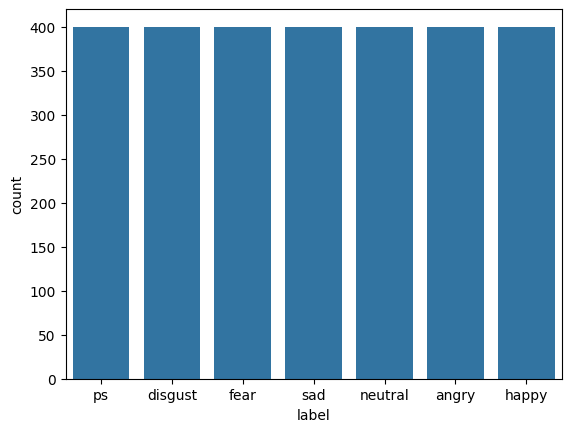

In [ ]:
sns.countplot(data=df, x='label')


In [ ]:
# dạng song
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
# Hiển thị spectrogram – tức là biểu đồ phổ tần số theo thời gian.
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

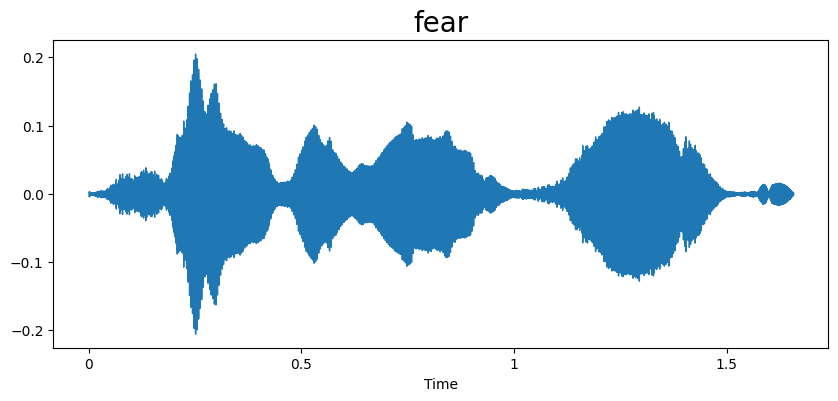

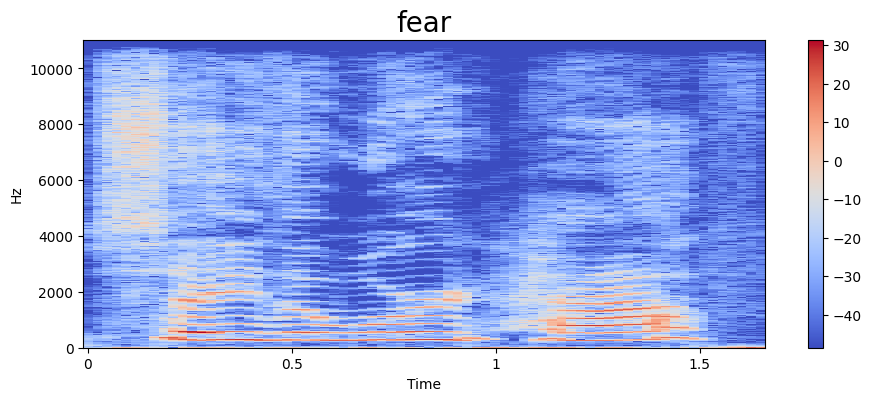

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

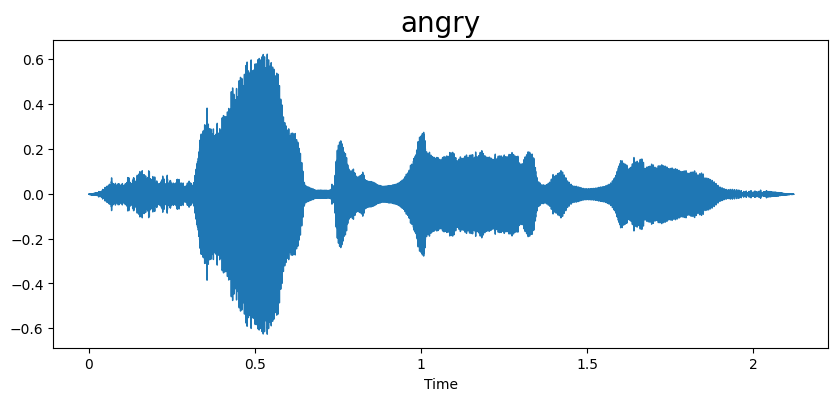

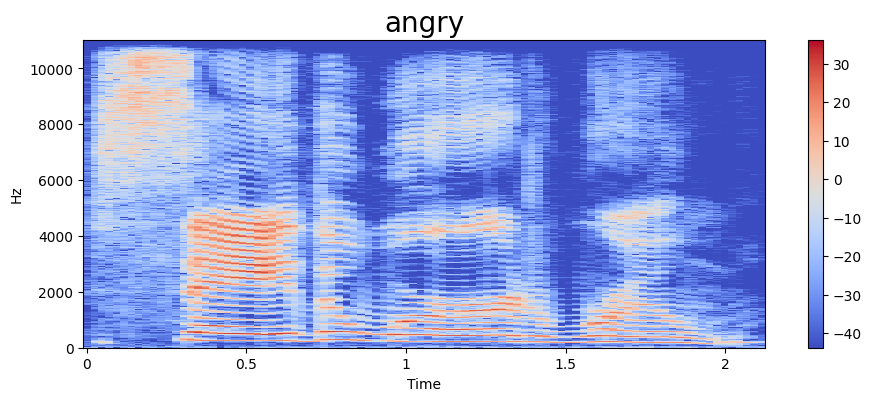

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

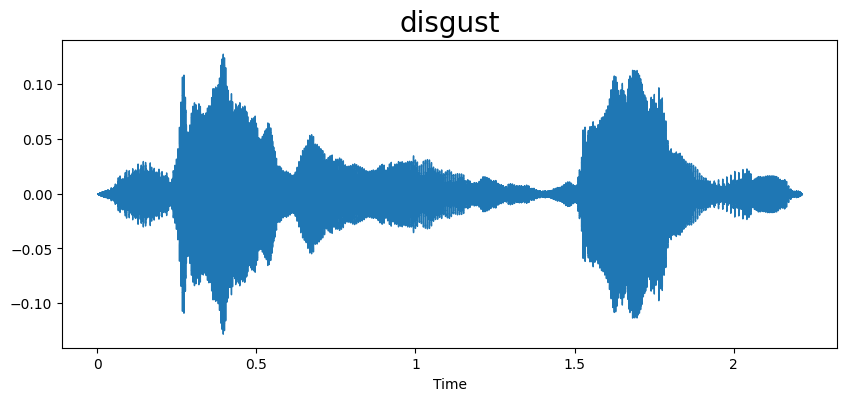

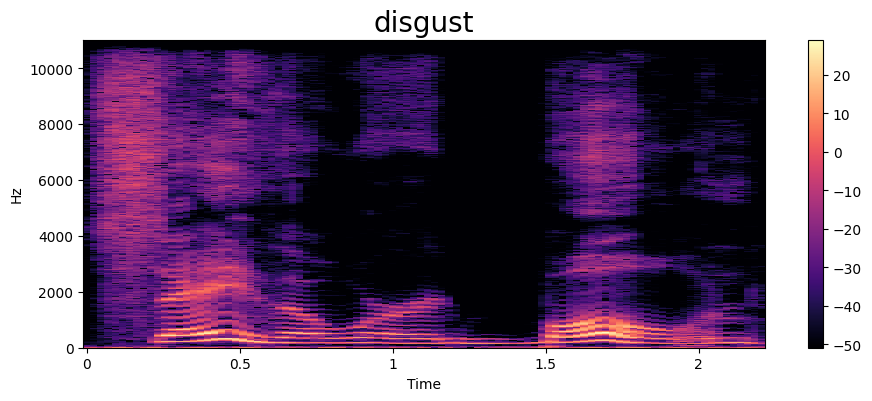

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

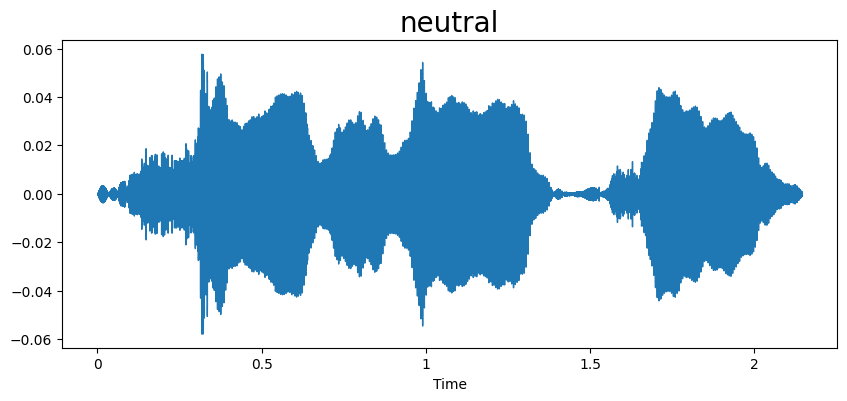

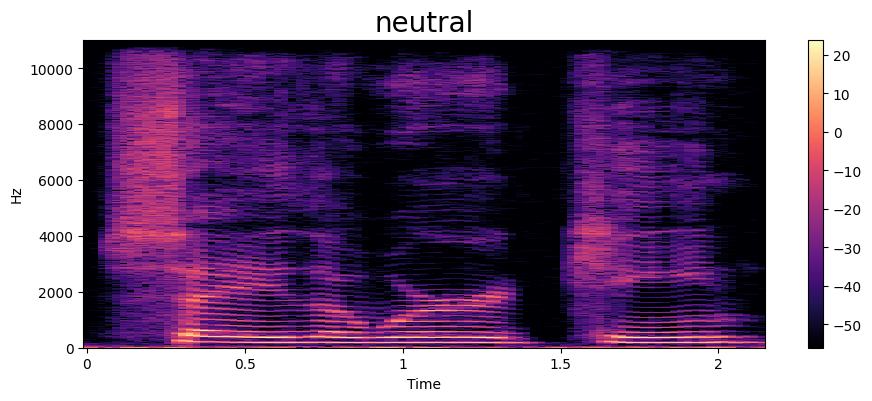

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

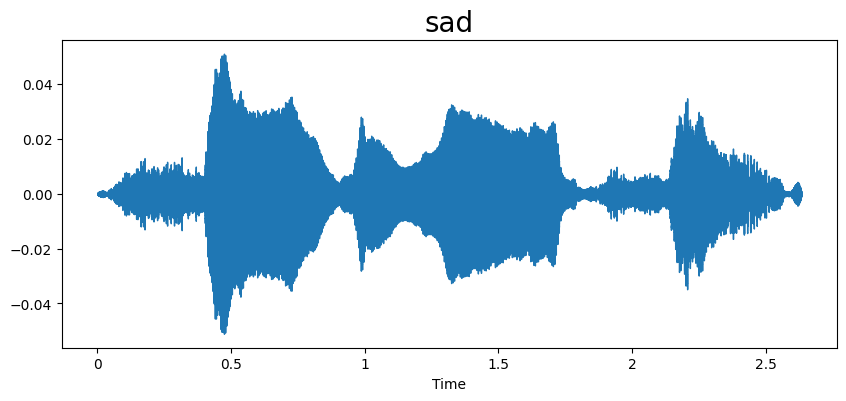

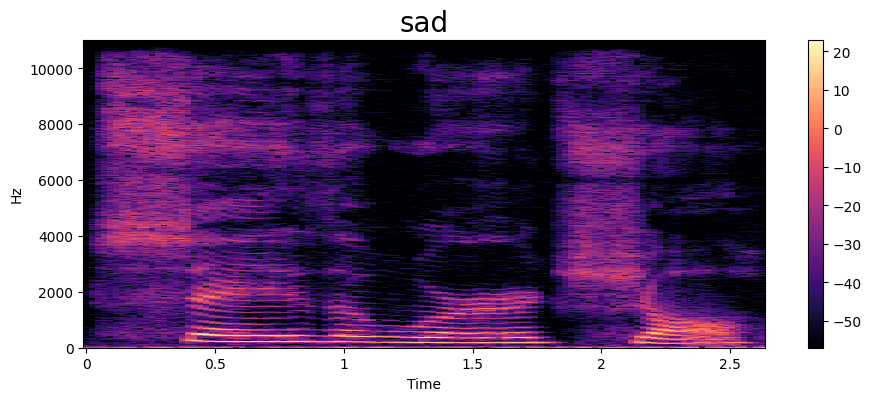

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

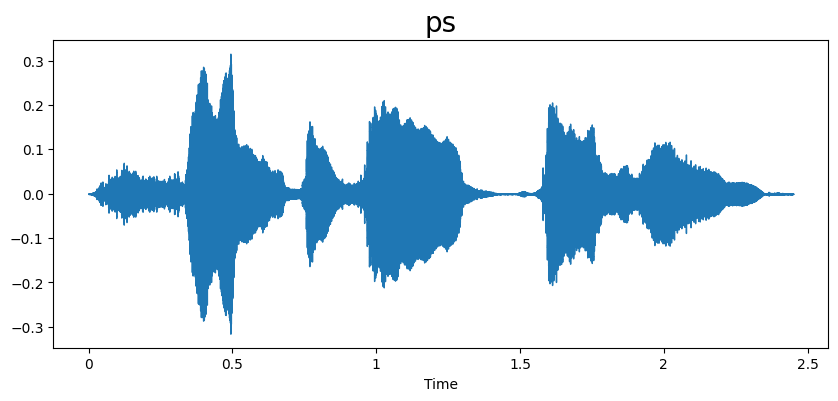

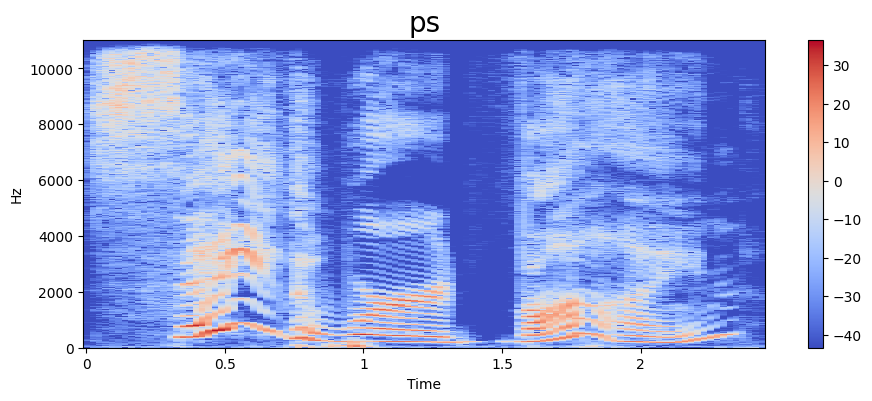

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

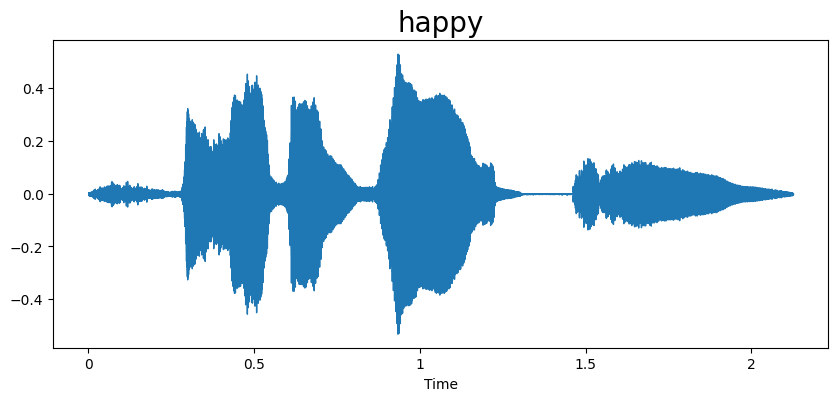

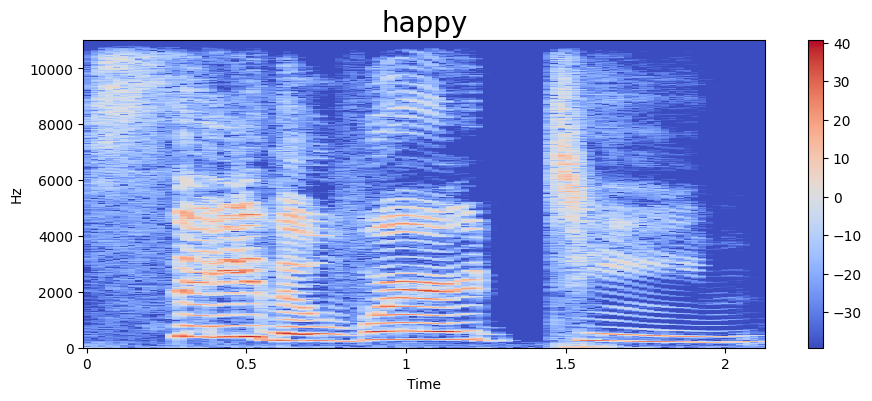

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])


array([-359.185     ,   78.53274   ,   -3.1970057 ,   -3.0061169 ,
         -6.7045083 ,   -4.4042964 ,   -5.836603  ,  -16.834345  ,
        -12.372062  ,   10.98924   ,  -14.610581  ,    1.1697906 ,
         -5.976504  ,    0.9158892 ,   -3.8168309 ,    0.51326704,
          1.4507734 ,    0.51116854,   -2.9605658 ,    2.3573506 ,
         -3.201479  ,   -0.834906  ,   -4.8268833 ,   -1.540687  ,
         -4.4520288 ,    2.7468193 ,   -3.3030765 ,    4.627607  ,
          5.635516  ,    8.3606825 ,    9.796656  ,   12.941368  ,
          5.4973764 ,   10.62206   ,    4.142919  ,    6.1025043 ,
          1.6971712 ,    3.3589644 ,    1.0684828 ,    1.8454767 ],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [ ]:
X_mfcc


,speech
0,"[-359.185, 78.53274, -3.1970057, -3.0061169, -..."
1,"[-385.81955, 106.04636, -9.253534, -10.513615,..."
2,"[-387.18848, 49.226757, -15.662876, 14.131284,..."
3,"[-350.80453, 77.4077, -9.017971, 11.781249, -1..."
4,"[-330.76318, 59.57205, -8.297699, -6.495669, -..."
...,...
2795,"[-397.60913, 103.34466, 8.832769, -16.087997, ..."
2796,"[-440.1182, 97.713135, 9.905804, -19.291803, -..."
2797,"[-373.37357, 61.090576, -0.9756544, -22.226019..."
2798,"[-433.44098, 65.63084, -3.9625237, -15.546078,..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()


In [ ]:
y.shape


(2800, 7)

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization

# --- Encoder ---
encoder_inputs = Input(shape=(40, 1))  # 40 bước thời gian, mỗi bước 1 đặc trưng MFCC
encoder_lstm = LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# --- Decoder ---

decoder_inputs = Input(shape=(1, 1))  # 1 bước đầu vào giả lập
decoder_lstm = LSTM(256, return_sequences=False, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

x = BatchNormalization()(decoder_outputs)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
decoder_dense = Dense(7, activation='softmax')(x)  # 7 lớp cảm xúc

# --- Model ---
model = Model([encoder_inputs, decoder_inputs], decoder_dense)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 40, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, 1, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ [(None, 256),     │    264,192 │ input_layer_15[0… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_16 (LSTM)      │ [(None, 256),     │    264,192 │ input_layer_16[0… │
│                     │ (None, 256),      │            │ lstm_15[0][1],    │
│                     │ (None, 256)]      │            │ lstm_15[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ lstm_16[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_33          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 256)       │     65,792 │ dropout_33[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_33[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_34          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 128)       │     32,896 │ dropout_34[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 128)       │          0 │ dense_34[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 7)         │        903 │ dropout_35[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 630,023 (2.40 MB)

 Trainable params: 628,999 (2.40 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

X_decoder = np.zeros((2800, 1, 1))
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    [X, X_decoder],  # 2 input đúng yêu cầu
    y,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[checkpoint]
)



Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5257 - loss: 1.3078
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 476ms/step - accuracy: 0.5290 - loss: 1.2975 - val_accuracy: 0.0000e+00 - val_loss: 2.1711
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8533 - loss: 0.3963
Epoch 2: val_accuracy improved from 0.00000 to 0.40536, saving model to best_model.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 258ms/step - accuracy: 0.8539 - loss: 0.3949 - val_accuracy: 0.4054 - val_loss: 1.9784
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9274 - loss: 0.2143
Epoch 3: val_accuracy improved from 0.40536 to 0.55536, saving model to best_model.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.9278 - loss: 0.2134 - val_accuracy: 0.5554 - val_loss: 1.7333
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.9546 - loss: 0.1321
Epoch 4: val_accuracy improved from 0.55536 to 0.60893, saving model to best_model.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.9546 - loss: 0.1322 - val_accuracy: 0.6089 - val_loss: 1.8810
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9742 - loss: 0.0816
Epoch 5: val_accuracy did not improve from 0.60893
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.9742 - loss: 0.0814 - val_accuracy: 0.5661 - val_loss: 1.9981
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9791 - loss: 0.0596
Epoch 6: val_accuracy did not improve from 0.60893
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.9789 - loss: 0.0602 - val_accuracy: 0.5357 - val_loss: 2.3827
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9655 - loss: 0.1032
Epoch 7: val_accuracy did not improve from 0.60893
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9655 - loss: 0.1033 - val_accuracy: 0.3875 - val_loss: 2.9236
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9679 - loss: 0.0909
Epoch 8: val_accuracy did not impr

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')


In [ ]:
from sklearn.model_selection import train_test_split

# Chia đồng thời cả X (MFCC), X_decoder (input giả lập) và y (label one-hot)
X_train, X_test, X_decoder_train, X_decoder_test, y_train, y_test = train_test_split(
    X, X_decoder, y, test_size=0.2, random_state=42
)

# Đánh giá mô hình
loss, accuracy = model.evaluate([X_test, X_decoder_test], y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8912 - loss: 1.2295
Test accuracy: 88.93%


In [ ]:
print(X_encoder_train.shape, X_encoder_test.shape)
print(X_decoder_train.shape, X_decoder_test.shape)
print(y_train.shape, y_test.shape)




(2240, 40, 1) (560, 40, 1)
(2240, 1, 1) (560, 1, 1)
(2240, 7) (560, 7)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step
              precision    recall  f1-score   support

       angry       1.00      0.69      0.81        70
     disgust       0.93      1.00      0.96        82
        fear       0.96      1.00      0.98        91
       happy       0.93      0.48      0.63        77
     neutral       1.00      1.00      1.00        89
          ps       0.59      1.00      0.74        67
         sad       0.97      1.00      0.98        84

    accuracy                           0.89       560
   macro avg       0.91      0.88      0.87       560
weighted avg       0.92      0.89      0.88       560



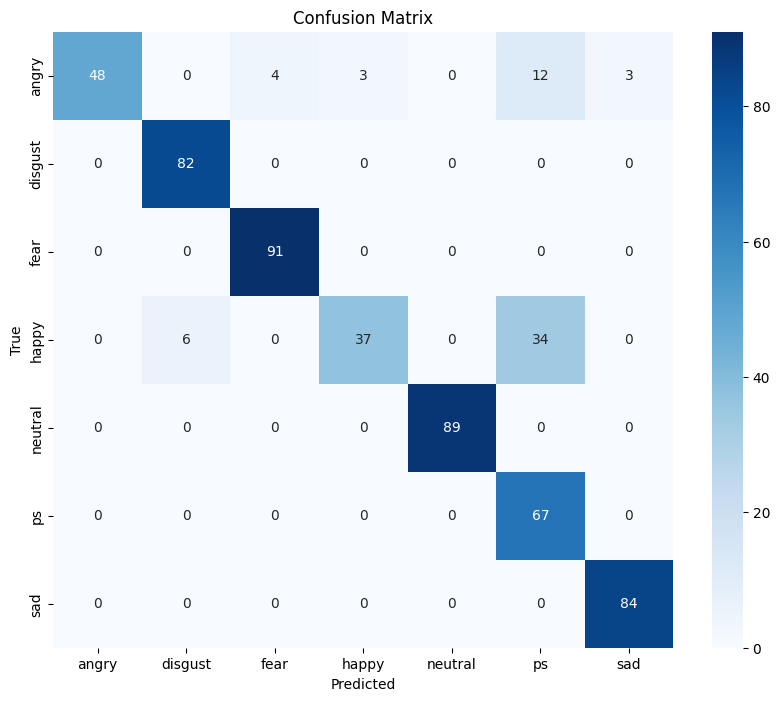

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict([X_encoder_test, X_decoder_test])

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=enc.categories_[0]))

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Vẽ ma trận nhầm lẫn với seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=enc.categories_[0],
            yticklabels=enc.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Plot the results


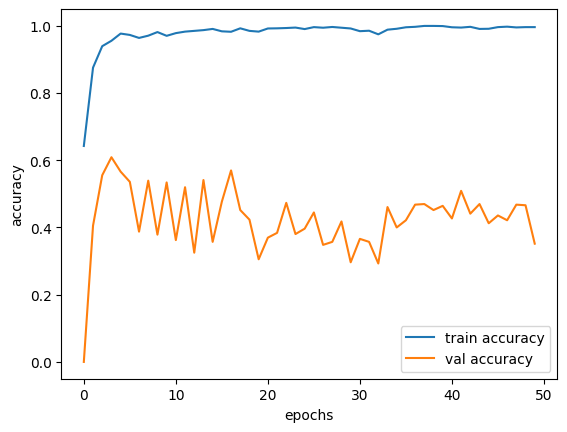

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

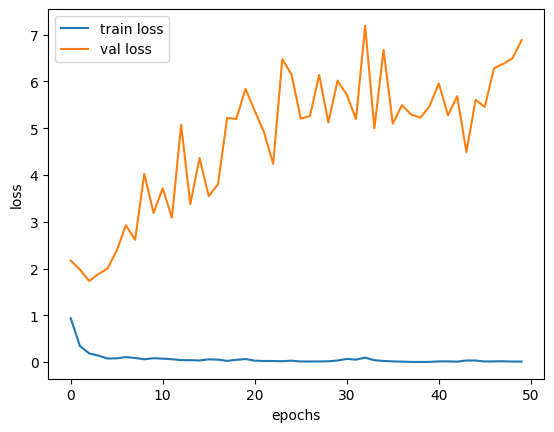

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import librosa
import numpy as np

# Tên file bạn vừa upload, ví dụ: 'test.wav'
file_name = list(uploaded.keys())[0]

# Load audio
audio, sample_rate = librosa.load(file_name, sr=22050)  # sr nên giống lúc train

# Trích xuất đặc trưng MFCC
mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

# Padding hoặc cắt về shape đúng như lúc train, ví dụ (40, 1)
# Nếu mfcc.shape là (40, n_frames), lấy trung bình theo trục thời gian để còn (40,)
mfcc_processed = np.mean(mfcc.T, axis=0)

# Reshape lại cho đúng input của mô hình (40, 1)
mfcc_processed = mfcc_processed.reshape(40, 1)
mfcc_processed = np.expand_dims(mfcc_processed, axis=0)  # thêm batch dimension


In [ ]:
prediction = model.predict(mfcc_processed)
predicted_label = np.argmax(prediction)

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Cảm xúc dự đoán:", emotions[predicted_label])

